<a href="https://colab.research.google.com/github/SamuelVanWilson/Machine-Learning-Daily-Projects/blob/main/DAY_5_KLASIFIKASI_DENGAN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KLASIFIKASI GAMBAR TULIS TANGAN DENGAN CONVOLUTIONAL NEURAL NETWORK**

###IMPORT LIBRARY

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

library `tensorflow` digunakan untuk melatih dan membuat model deep learning

---

`from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense` package-package ini berguna membuat layer-layer khusus yang nantinya membangun **convulutional neural network**/**CNN**
- `Conv2D` mencari dan mengekstrak pola/fitur tertentu dari gambar
- `MaxPooling2D` mengurangi dimensi gambar tetapi tetap mempertahankan fitur penting pada gambar
- `Flatten` mengubah output 2D dari layer **CNN** menjadi vektor 1D untuk *layer fully connected*

- `Dense` setelah ekstraksi fitur oleh `Conv2D` dan `MaxPooling2D`, layer ini bertugas "memutuskan" kelas berdasarkan fitur yang ditemukan

---

`from tensorflow.keras.models import Sequential` digunakan untuk membangun model neural network secara berurutan(*layer-by-layer*)

---

`import numpy as np` untuk komputasi numerik yang stabil pada model

`import matplotlib.pyplot as plt` digunakan untuk visualisasi grafik data pada model

###PREPROCESSING DATA

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255
x_test = x_test / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


`tf.keras.datasets.mnist.load_data()` digunakan untuk mengekstrak data **MNIST** lalu dipisahkan datanya untuk membuat data training, dan data test yang disimpan kedalam variabel:
- `x_train` fitur/input data training
- `y_train` label/output data training
- `x_test` fitur/input data test
- `y_test` label/output data test

---

`x_train.reshape()` mengubah bentuk data gambar 3D(jumlah_gambar, tinggi, lebar) menjadi 4D(jumlah_gambar, tinggi, lebar, channel), kita mengubah bentuk datanya karena **CNN** mengharapkan 4D bukan 3D

---

`x_train = x_train / 255` dan `x_test = x_test / 255` variabel kedua ini dilakukan normalisasi dari rentang `0-255` ke `0-1`, ini dilakukan agar model **CNN** agar belajar lebih baik karena kalau nilainya terlalu besar perhitungan matematika di model jadi tidak stabil

---

`tf.keras.utils.to_categorical(y_train, 10)` mengubah label angka(0-9)menjadi **one-hot encoding** dengan vektor biner 10(karena ada 10 kelas)

###MEMBUAT MODEL CNN

In [ ]:

model = Sequential([
 Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 MaxPooling2D((2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D((2,2)),

 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])

model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)

variabel `model`untuk menyimpan model yang sudah dibuat menggunakan`Sequential()`

---

####**Membuat Model**

selain `Sequential()` bisa membuat model neural network, `Sequential()` juga bisa membuat **CNN**

Model CNN memiliki **layer khusus untuk gambar** yang tidak ada di neural network biasa:
1. **`Conv2D`** (Convolutional Layer) → Mengekstrak fitur lokal (seperti tepi, pola).  
2. **`MaxPooling2D`** → Mengurangi dimensi gambar dan memperkuat fitur penting.  

layer yang ada didalam **CNN**:
- `Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))`
 - **`filters=32`**: Jumlah **filter** (atau kernel) yang digunakan. Setiap filter bertugas mendeteksi pola tertentu (misal: garis vertikal, lingkaran). **Contoh**: 32 filter = 32 pola berbeda yang dipelajari.  

 - **`kernel_size=(3,3)`**: Ukuran filter (3x3 piksel). Filter ini akan "berjalan" (slide) di seluruh gambar untuk mendeteksi pola. **Analoginya**: Seperti senter 3x3 yang menyinari bagian kecil gambar.  

 - **`input_shape=(28,28,1)`**: Bentuk input gambar: tinggi=28, lebar=28, channel=1 (grayscale). **Catatan**: Hanya perlu didefinisikan di layer pertama.
 - **`activation='relu'`** mengubah nilai negatif menjadi 0 dan membiarkan nilai tetap menjadi positif, ini sangat penting untuk membantu model mempelajari pola kompleks dari data

- `MaxPooling2D((2,2))` Mengurangi dimensi gambar agar model lebih fokus pada fitur dominan (misal: garis tebal)

---

####**Mengompilasi Model**

- **optimizer**: algoritma untuk memperbarui bobot model
- **loss function**: fungsi untuk mengukur kesalahan prediksi model
- **metrics**: metrik untuk mengevaluasi performa model

**parameter compile**:
1. `optimizer='adam'` digunakan untuk menyesuaikan bobot model untuk meminimalkan kesalahan. `adam` adalah optimizer yang populer karena cepat dan efisien.
2. `loss='categorical_crossentropy'` digunakan untuk mengukur kesalahan prediksi untuk masalah klasifikasi multi-kelas
3. `metrics=['accuracy']` digunakan untuk mengukur akurasi

###MELATIH MODEL

In [ ]:
history = model.fit(
 x_train, y_train,
 epochs=5,
 validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8985 - loss: 0.3301 - val_accuracy: 0.9835 - val_loss: 0.0568
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9847 - loss: 0.0509 - val_accuracy: 0.9847 - val_loss: 0.0489
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9861 - val_loss: 0.0534
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9922 - loss: 0.0236 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9903 - val_loss: 0.0365


variabel `history` untuk menyimpan riwayat pelatihan model

---

`model.fit()` berguna untuk melatih model

parameternya:
- `x_train` fitur yang digunakan untuk dilatih model
-`y_train` label yang digunakan untuk dilatih model
- `epochs` digunakan untuk mengulang model selama berlatih, karena epochsnya 5 kali maka, model berlatih dengan data training secara 5 kali berulang
- `validation_split=0.2` digunakan untuk validasi model selama latihan, ini seperti "ujian kecil" selama latihan model berjalan, karena nilainya `0.2` maka model akan melakukan ujian kecil menggunakan 20% data training

###EVALUASI MODEL

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nAkurasi Test Dengan CNN: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9892 - loss: 0.0367

Akurasi Test Dengan CNN: 0.9913


`model.evaluate()` digunakan untuk mengevaluasi model, ini seperti *tes ujian akhir* bagi model untuk melihat seberapa baik model bekerja, karena *method* ini mengembalikan berupa 2 nilai yaitu **nilai akurasi** yang disimpan kedalam variabel `test_acc` dan **nilai kesalahan selama tes** yang disimpan kedalam variabel `test_loss`, jadi tahap ini merupakan tahap model memakai data test, karena parameter permata menggunakan **fitur data test** yakni `x_test` dan parameter kedua **label data test** yakni `y_test`

###PREDIKSI GAMBAR

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


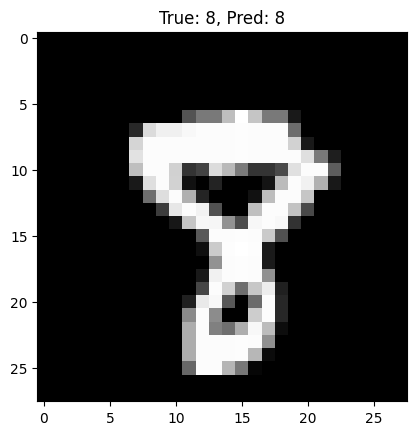

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


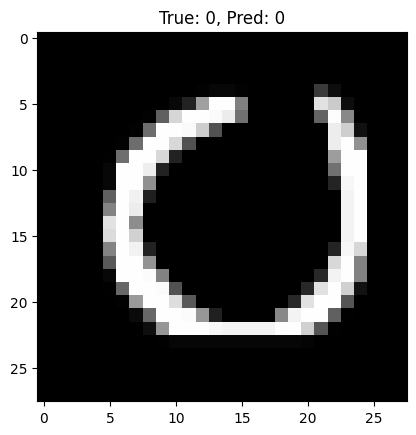

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


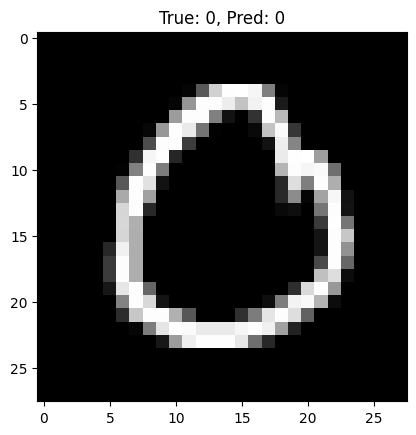

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


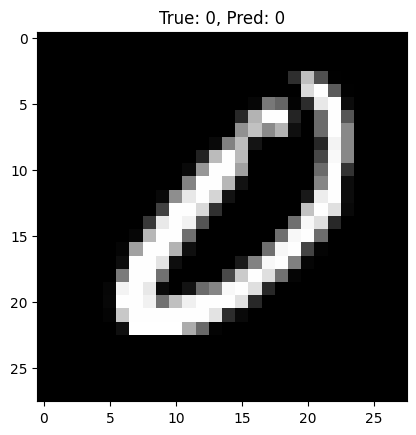

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


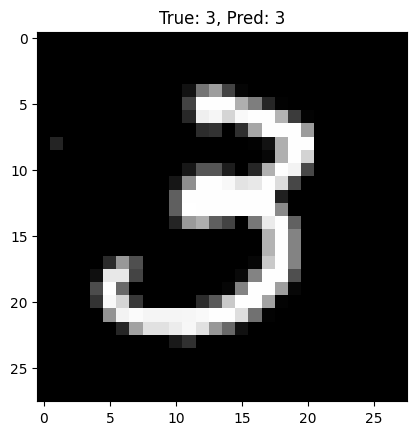

In [ ]:

indices = np.random.choice(len(x_test), 5)

for i in indices:
    img = x_test[i]
    true_label = np.argmax(y_test[i])

    pred = model.predict(img.reshape(1, 28, 28))
    pred_label = np.argmax(pred)

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.show()

variabel `indices` dugunakan untuk memilih 5 angka random, yang akan digunakan untuk memilih data secara acak sesuai nilai maksimum dataset, karena menggunakan fungsi `np.random.choice()`

---

perulangan `for i in indices:` digunakan untuk menampilkan gambar tulis tangan dan hasil prediksi model *satu persatu*